   # Parallel Transport
   Show that the parallel transport around a 2-sphere reorients the transported vector.

Install ```python``` packages for symbolic manipulation:

In [6]:
import sympy as sym

Define two coordinates to describe the 2-sphere, $\theta$ and $\phi$:

In [7]:
theta, phi, r = sym.symbols('theta, phi, r')

The metric for the 2-sphere is:
$$
g_{\alpha, \beta} = \begin{bmatrix}
r^2 & 0 \\
0 & r^2 \sin^2\theta
\end{bmatrix}
$$
$$
g^{\alpha, \beta} = \begin{bmatrix}
\frac{1}{r^2} & 0 \\
0 & \frac{1}{r^2 \sin^2\theta}
\end{bmatrix}
$$

In [8]:
gab = sym.Matrix([[r**2, 0], [0, r ** 2 * sym.sin(theta)**2]])

The equation for parallel transport of a vector $v^\beta$ along a curve $C$ with a tangent
$t^\alpha$ is:
$$
t^\alpha \nabla_\alpha v^\beta = 0 
$$
or explicitly in a coordinate system:
$$
t^\alpha \partial_\alpha v^\beta + t^\alpha \Gamma^\beta_{\alpha\gamma} v^\gamma = 0
$$

Expanding these tensor relationships in the given coordinate system gives:
$$
\begin{align}
t^\theta \partial_\theta v^\theta + t^\phi \partial_\phi v^\theta + t^\theta \Gamma_{\theta\theta}^\theta v^\theta +
t^\theta \Gamma_{\theta\phi}^\theta v^\phi + t^\phi \Gamma_{\phi\theta}^\theta v^\theta +t^\phi \Gamma_{\phi\phi}^\theta v^\phi = 0
\end{align}
$$
$$
\begin{align}
t^\theta \partial_\theta v^\phi + t^\phi \partial_\phi v^\phi + t^\theta \Gamma_{\theta\theta}^\phi v^\theta +
t^\theta \Gamma_{\theta\phi}^\phi v^\phi + t^\phi \Gamma_{\phi\theta}^\phi v^\theta +t^\phi \Gamma_{\phi\phi}^\phi v^\phi = 0
\end{align}
$$
Now consider the Christoffel symbols:
$$
\Gamma^\beta_{\alpha\gamma} = \frac{1}{2} g^{\beta\delta} (\partial_{\alpha}g_{\gamma\delta} + \partial_{\gamma}g_{\alpha\delta}-\partial_{\delta}g_{\alpha\gamma})
$$
Exploiting the fact that the Christoffel symbols are symmetric in the lower two indices it is sufficient to consider the following symbols: $\Gamma^\theta_{\theta\theta}$, $\Gamma^\phi_{\phi\phi}$, $\Gamma^\theta_{\theta\phi}$, $\Gamma^\theta_{\phi\phi}$, $\Gamma^\phi_{\theta\phi}$, $\Gamma^\phi_{\theta\theta}$ .

Now the
Expanding the terms in the given coordinate system and remembering that off diagonal components of the metric
are zero:
$$
\Gamma^\theta_{\theta\theta} = \frac{1}{2} g^{\theta\theta} (\partial_{\theta}g_{\theta\theta} + \partial_{\theta}g_{\theta\theta}-\partial_{\theta}g_{\theta\theta}) = 0
$$
$$
\Gamma^\phi_{\phi\phi} = \frac{1}{2} g^{\phi\phi} (\partial_{\phi}g_{\phi\phi}+\partial_{\phi}g_{\phi\phi}-\partial_{\phi}g_{\phi\phi}) = 0
$$
$$
\Gamma^\theta_{\theta\phi} = \frac{1}{2} g^{\theta\theta} (\partial_{\phi}g_{\phi\theta} + \partial_{\phi}g_{\phi\theta}-\partial_{\phi}g_{\theta\theta}) = 0
$$
$$
\Gamma^\theta_{\phi\phi} = \frac{1}{2} g^{\theta\theta}(\partial_{\phi}g_{\phi\theta}+\partial_{\phi}g_{\phi\theta}-\partial_{\theta}g_{\phi\phi}) = - \frac{1}{2} g^{\theta\theta} \partial_\theta g_{\phi\phi}
$$
$$
\Gamma^\phi_{\theta\phi} = \frac{1}{2} g^{\phi\phi} (\partial_\theta g_{\phi\phi} + \partial_\phi g_{\theta\phi} - \partial_\phi g_{\theta\phi}) = \frac{1}{2} g^{\phi\phi} \partial_\theta g_{\phi\phi}
$$
$$
\Gamma^\phi_{\theta\theta} = \frac{1}{2} g^{\phi\phi} (\partial_\theta g_{\theta\phi} + \partial_{\theta} g_{\theta\phi} - \partial_\phi g_{\theta\theta}) = 0
$$
Therefore there are only 3 non-zero Christoffel symbols $\Gamma^\theta_{\phi\phi}$, $\Gamma^\phi_{\theta\phi}$ and $\Gamma^\phi_{\phi\theta}$. This simplifies the equations for parallel transport dramatically to:
$$
\begin{align}
t^\theta \partial_\theta v^\theta + t^\phi \partial_\phi v^\theta +t^\phi \Gamma_{\phi\phi}^\theta v^\phi = 0
\end{align}
$$
$$
\begin{align}
t^\theta \partial_\theta v^\phi + t^\phi \partial_\phi v^\phi+
t^\theta \Gamma_{\theta\phi}^\phi v^\phi + t^\phi \Gamma_{\phi\theta}^\phi v^\theta = 0
\end{align}
$$

In [9]:
- sym.Rational(1, 2) * (gab**-1)[0] * gab[3].diff(theta)

-sin(theta)*cos(theta)

In [10]:
sym.Rational(1, 2) * (gab**-1)[3] * gab[3].diff(theta)

cos(theta)/sin(theta)

Import plotting libraries

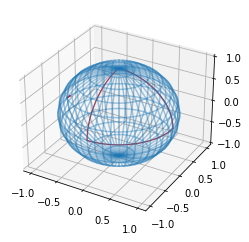

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def spherical_mesh(x0, y0, z0, radius):
    phi = np.linspace(0, np.pi, 25)
    theta = np.linspace(0, 2 * np.pi, 25)
    phi_mesh, theta_mesh = np.meshgrid(theta, phi)
    x = radius * np.sin(phi_mesh) * np.cos(theta_mesh)
    y = radius * np.sin(phi_mesh) * np.sin(theta_mesh)
    z = radius * np.cos(phi_mesh)
    return x+x0, y+y0, z+z0

def spherical2cartesian(theta, phi, r):
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)
    return x, y, z

ax = plt.figure().add_subplot(projection='3d')

phi = np.linspace(0, np.pi/2, 50)
theta = 0
r = 1
x, y, z = spherical2cartesian(theta, phi, r)
ax.plot(x, y, z, color="r", linewidth=1)

theta = -np.pi/2
x, y, z = spherical2cartesian(theta, phi, r)
ax.plot(x, y, z, color="r", linewidth=1)

phi = np.pi/2
theta = np.linspace(-np.pi/2, 0, 50)
x, y, z = spherical2cartesian(theta, phi, r)
ax.plot(x, y, z, color="r", linewidth=1)
x, y, z = spherical2cartesian(np.pi, np.pi/2, 1)
ax.quiver(x, y, z, 0, 1, 0, length=0.1, normalize=True, color='r')
x, y, z = spherical_mesh(0, 0, 0, 1)
ax.plot_wireframe(x, y, z, alpha=0.4)
plt.show()